# Target 

    To avoid overfitting in the last architecture 

# Result 

    Once the dropout is introduced, the overfitting is avoided now 
    test_accuracy -> 99.24%
    train_accuracy -> 99.23%
    parameters -> 7,964

# Analysis 

    Introducing dropout with batchnormalization becomes important, sometimes batchnormalization alone can not avoid overfitting, also finding the right value of dropout is also very important 

In [1]:
# Initialized Logger
import torch
import torch.optim as optim
from torchvision import datasets
from torchsummary import summary
from model import Net
from utils import data_transformation,get_device, \
                  fit_model, plot_accuracy_report, \
                  show_random_results, plot_misclassified, \
                  calculate_accuracy_per_class

CODE BLOCK: 2

In [2]:
# CUDA?
device = get_device()
print("Available Device :: ", device)

INFO:utils:device: cuda


Available Device ::  cuda


CODE BLOCK: 3

In [3]:
transformation_matrix = {
                         "mean_of_data":(0.1307,),
                         "std_of_data": (0.3081,)
                         }

dataloader_kwargs = {'batch_size': 64, 'shuffle': True, 'num_workers': 1, 'pin_memory': True}


train_transforms, test_transforms = data_transformation(transformation_matrix)
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

train_loader = torch.utils.data.DataLoader(train_data, **dataloader_kwargs)
test_loader = torch.utils.data.DataLoader(test_data, **dataloader_kwargs)

INFO:utils:transformation Details ::: 


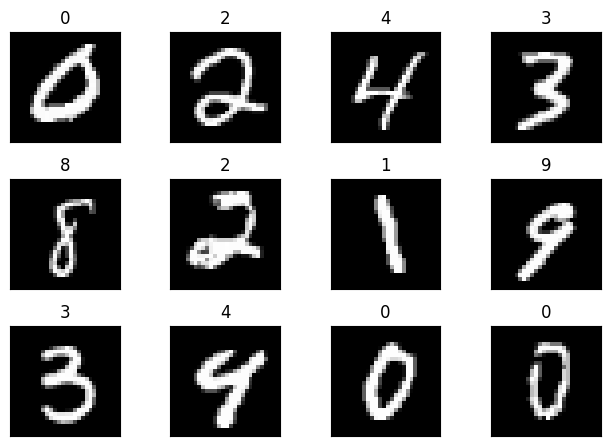

In [4]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [5]:
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 26, 26]              36
              ReLU-2            [-1, 4, 26, 26]               0
       BatchNorm2d-3            [-1, 4, 26, 26]               8
           Dropout-4            [-1, 4, 26, 26]               0
            Conv2d-5           [-1, 10, 24, 24]             360
              ReLU-6           [-1, 10, 24, 24]               0
       BatchNorm2d-7           [-1, 10, 24, 24]              20
           Dropout-8           [-1, 10, 24, 24]               0
            Conv2d-9           [-1, 16, 22, 22]           1,440
             ReLU-10           [-1, 16, 22, 22]               0
      BatchNorm2d-11           [-1, 16, 22, 22]              32
          Dropout-12           [-1, 16, 22, 22]               0
        MaxPool2d-13           [-1, 16, 11, 11]               0
           Conv2d-14           [-1, 12,

In [6]:
training_parameters = {"learning_rate":0.01,
                       "momentum":0.9,
                       "num_epochs":15
                       }
train_losses, test_losses, train_acc, test_acc = fit_model(model,training_parameters,train_loader,test_loader,device)

Epoch 1


Train: Loss=0.0941 Batch_id=937 Accuracy=94.01: 100%|██████████| 938/938 [00:29<00:00, 31.48it/s]


Test set: Average loss: 0.0500, Accuracy: 9846/10000 (98.46%)

Epoch 2


Train: Loss=0.0367 Batch_id=937 Accuracy=98.14: 100%|██████████| 938/938 [00:23<00:00, 39.36it/s]


Test set: Average loss: 0.0357, Accuracy: 9887/10000 (98.87%)

Epoch 3


Train: Loss=0.1662 Batch_id=937 Accuracy=98.53: 100%|██████████| 938/938 [00:24<00:00, 38.98it/s]


Test set: Average loss: 0.0378, Accuracy: 9884/10000 (98.84%)

Epoch 4


Train: Loss=0.0349 Batch_id=937 Accuracy=98.67: 100%|██████████| 938/938 [00:24<00:00, 37.84it/s]


Test set: Average loss: 0.0296, Accuracy: 9903/10000 (99.03%)

Epoch 5


Train: Loss=0.0012 Batch_id=937 Accuracy=98.73: 100%|██████████| 938/938 [00:23<00:00, 39.34it/s]


Test set: Average loss: 0.0260, Accuracy: 9915/10000 (99.15%)

Epoch 6


Train: Loss=0.0236 Batch_id=937 Accuracy=98.86: 100%|██████████| 938/938 [00:23<00:00, 39.22it/s]


Test set: Average loss: 0.0245, Accuracy: 9923/10000 (99.23%)

Epoch 7


Train: Loss=0.0541 Batch_id=937 Accuracy=98.94: 100%|██████████| 938/938 [00:24<00:00, 38.55it/s]


Test set: Average loss: 0.0279, Accuracy: 9911/10000 (99.11%)

Epoch 8


Train: Loss=0.0499 Batch_id=937 Accuracy=99.03: 100%|██████████| 938/938 [00:24<00:00, 38.90it/s]


Test set: Average loss: 0.0248, Accuracy: 9915/10000 (99.15%)

Epoch 9


Train: Loss=0.0774 Batch_id=937 Accuracy=99.03: 100%|██████████| 938/938 [00:23<00:00, 39.31it/s]


Test set: Average loss: 0.0224, Accuracy: 9926/10000 (99.26%)

Epoch 10


Train: Loss=0.0045 Batch_id=937 Accuracy=99.09: 100%|██████████| 938/938 [00:24<00:00, 38.74it/s]


Test set: Average loss: 0.0242, Accuracy: 9925/10000 (99.25%)

Epoch 11


Train: Loss=0.0064 Batch_id=937 Accuracy=99.11: 100%|██████████| 938/938 [00:23<00:00, 39.31it/s]


Test set: Average loss: 0.0212, Accuracy: 9929/10000 (99.29%)

Epoch 12


Train: Loss=0.0092 Batch_id=937 Accuracy=99.14: 100%|██████████| 938/938 [00:24<00:00, 38.33it/s]


Test set: Average loss: 0.0236, Accuracy: 9925/10000 (99.25%)

Epoch 13


Train: Loss=0.0168 Batch_id=937 Accuracy=99.21: 100%|██████████| 938/938 [00:24<00:00, 38.82it/s]


Test set: Average loss: 0.0230, Accuracy: 9920/10000 (99.20%)

Epoch 14


Train: Loss=0.0783 Batch_id=937 Accuracy=99.23: 100%|██████████| 938/938 [00:24<00:00, 39.05it/s]


Test set: Average loss: 0.0243, Accuracy: 9924/10000 (99.24%)

Epoch 15


Train: Loss=0.0092 Batch_id=937 Accuracy=99.21: 100%|██████████| 938/938 [00:24<00:00, 38.65it/s]


Test set: Average loss: 0.0243, Accuracy: 9923/10000 (99.23%)



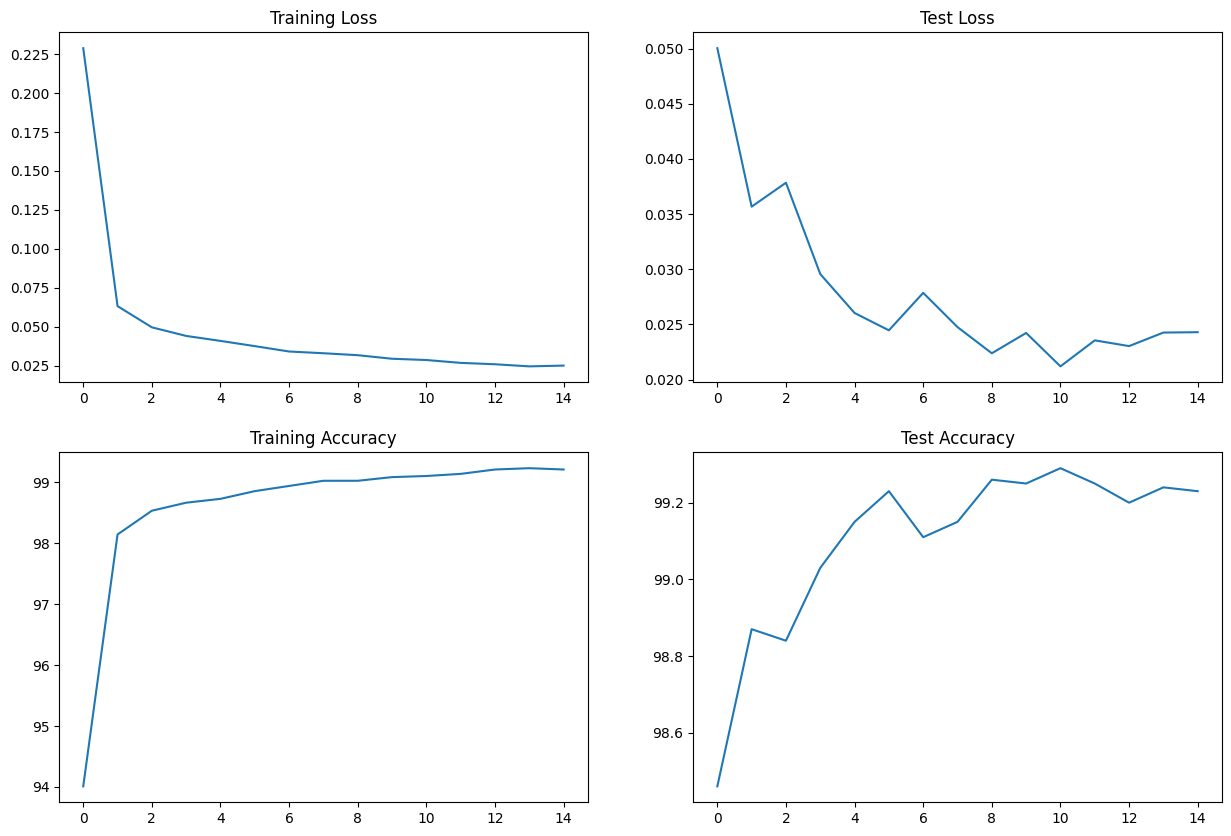

In [7]:
plot_accuracy_report(train_losses, test_losses, train_acc, test_acc)

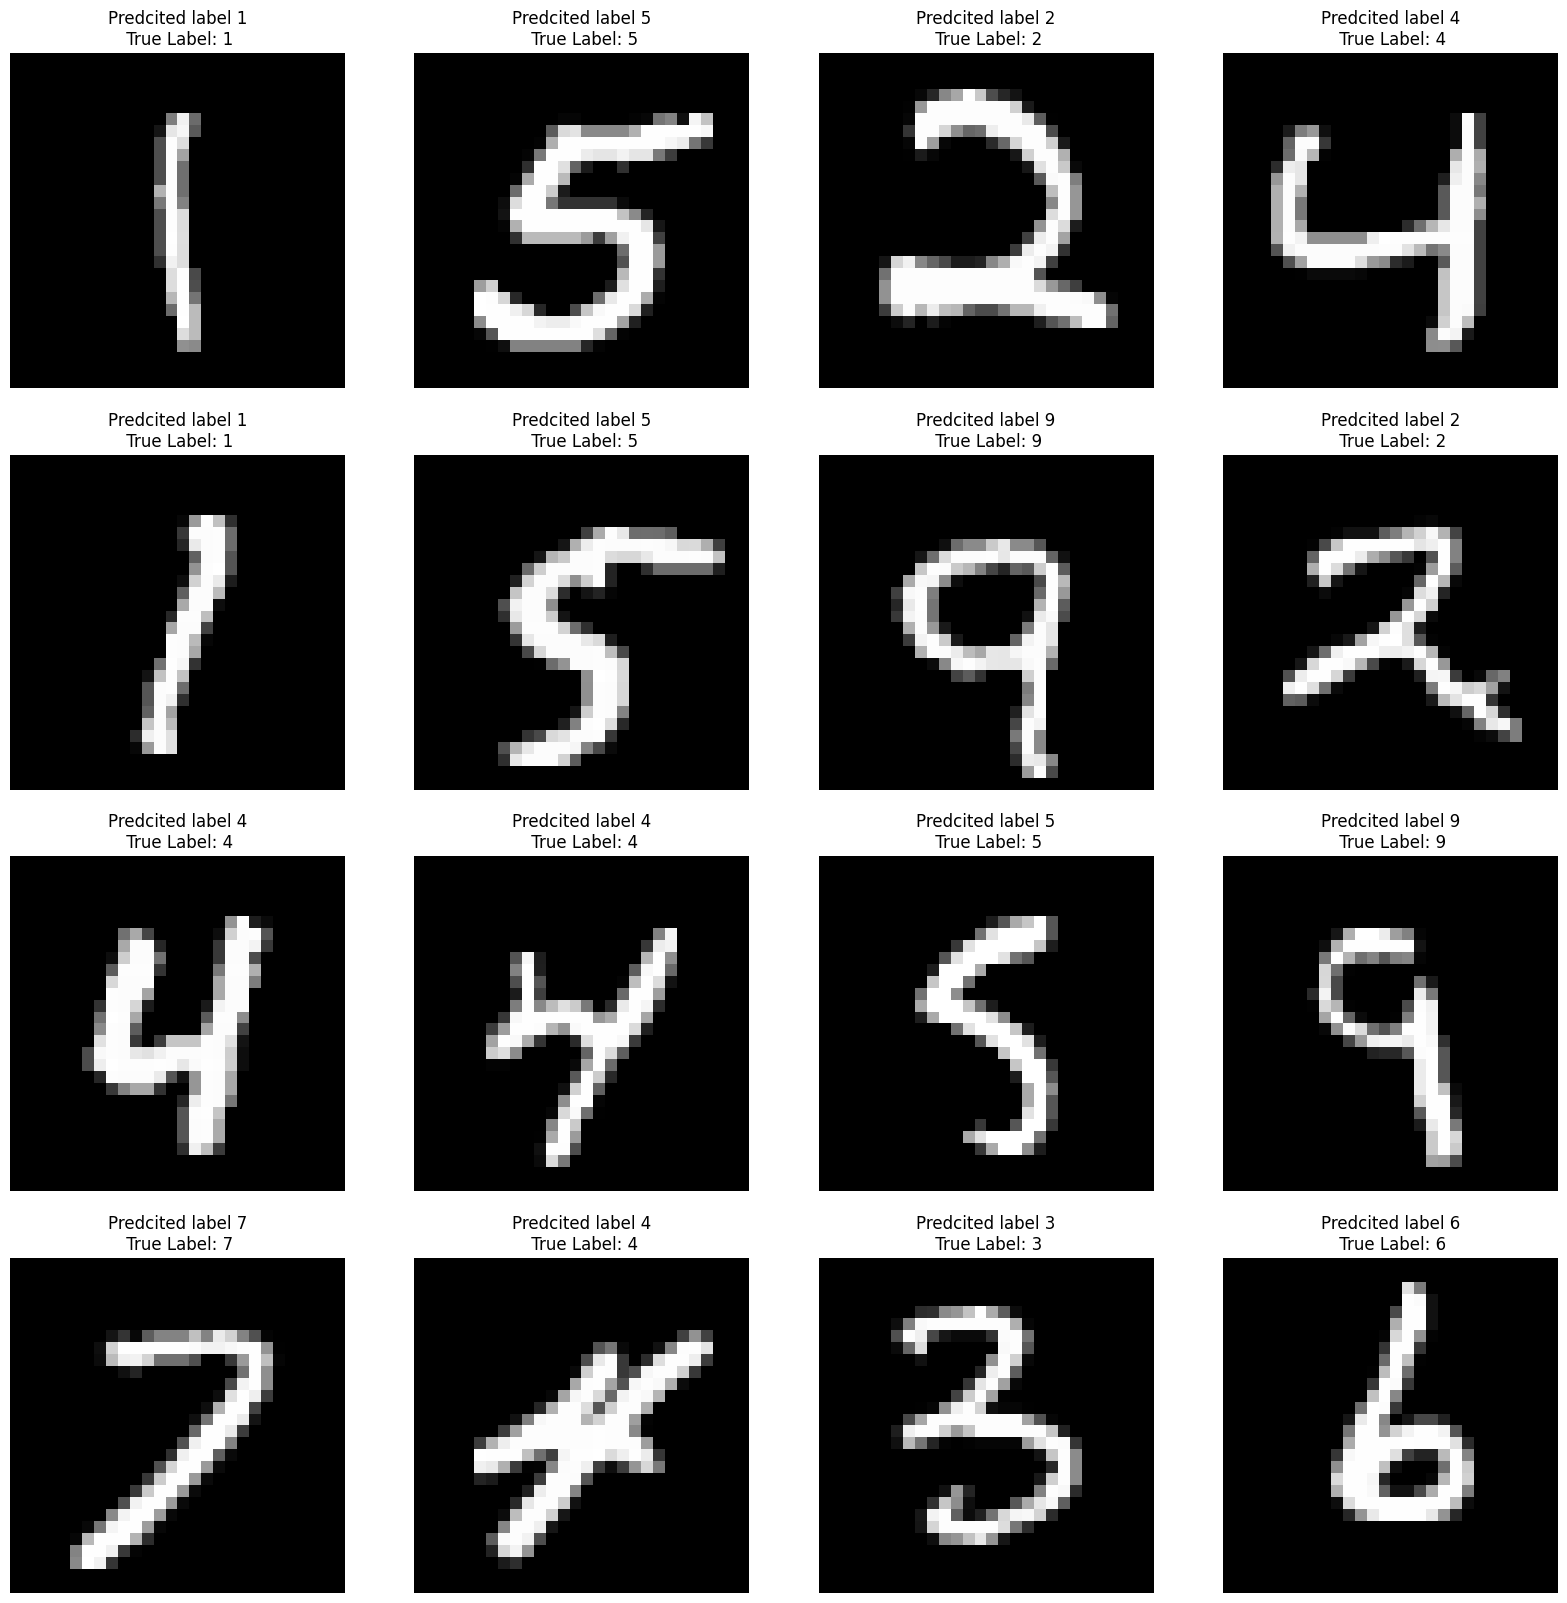

In [8]:
grid_size = (4,4)
show_random_results(test_loader,grid_size,model,device)

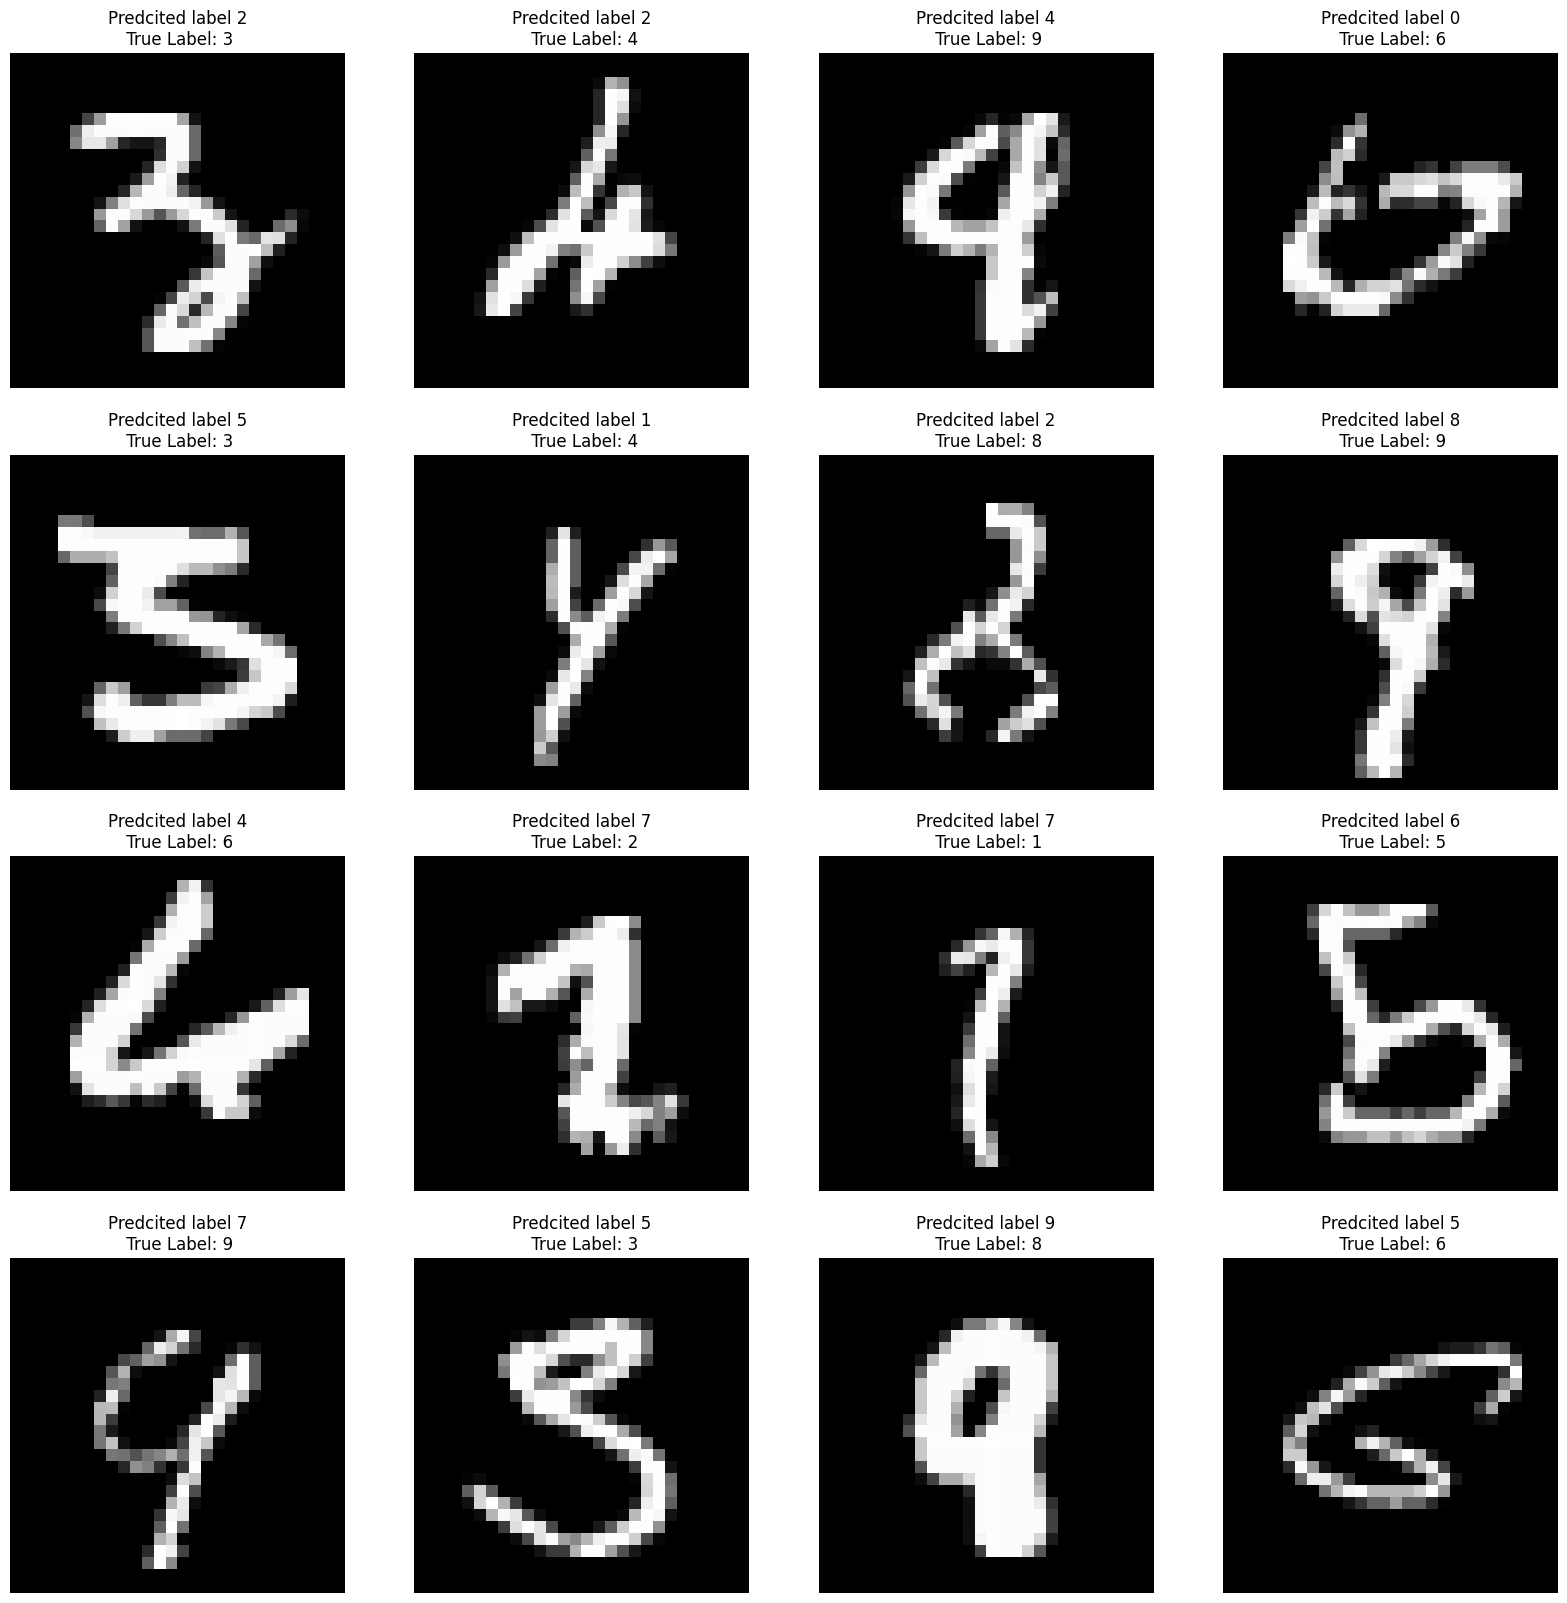

In [9]:
grid_size = (4,4)
plot_misclassified(model,grid_size,test_loader,device)

Accuracy of 0 - zero : 100 %
Accuracy of 1 - one : 99 %
Accuracy of 2 - two : 100 %
Accuracy of 3 - three : 100 %
Accuracy of 4 - four : 99 %
Accuracy of 5 - five : 100 %
Accuracy of 6 - six : 98 %
Accuracy of 7 - seven : 98 %
Accuracy of 8 - eight : 100 %
Accuracy of 9 - nine : 98 %


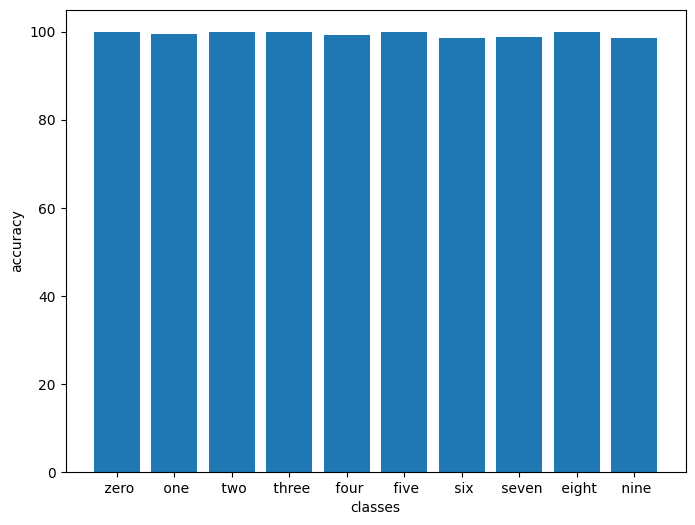

In [10]:
calculate_accuracy_per_class(model,device,test_loader,test_data)